### Evaluation: 
$ \text{RMSLE} = \sqrt{\frac{1}{N} \sum^N_{i=1} (\log(y_i+1)-\log(\hat{y}_i + 1))^2}$

- Exploratory Data Analysis
- Feature Engeneering
- Model building
- Evaluation

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv("data/test.csv")
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [3]:
test.shape

(4398, 22)

In [4]:
test.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
dtype: object

### EDA (Train data)

In [5]:
train = pd.read_csv("data/train.csv")
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [6]:
train.dtypes

id                         int64
belongs_to_collection     object
budget                     int64
genres                    object
homepage                  object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity               float64
poster_path               object
production_companies      object
production_countries      object
release_date              object
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
Keywords                  object
cast                      object
crew                      object
revenue                    int64
dtype: object

In [7]:
train.shape

(3000, 23)

In [8]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [9]:
train["belongs_to_collection"] = train["belongs_to_collection"].fillna(0)

In [10]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,0,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [11]:
collection = train["belongs_to_collection"].tolist()
type(collection)

list

In [ ]:
collection

### belongs_to_collection

In [13]:
collection[0].split(', ')[1].partition("'name': '")[2].replace("'", '')

'Hot Tub Time Machine Collection'

In [14]:
collection_nm = list(map(lambda x: str(x).split(', ')[1].partition("'name': '")[2].replace("'", '') 
                         if x != 0 else 0, collection))

In [ ]:
collection_nm

In [16]:
train['collection_nm'] = collection_nm

In [508]:
train['collection_nm'].loc[train['collection_nm'] != 0] = 1

In [509]:
train['collection_nm'].head()

0    1
1    1
2    0
3    0
4    0
Name: collection_nm, dtype: int64

In [510]:
collection_nm = train['collection_nm']
collection_nm.shape

(3000,)

### genres

In [ ]:
train['genres']

In [18]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d
train = train
train['genres'] = train['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
genres = train.genres.str.get_dummies(sep=',')
train = pd.concat([train, genres], axis=1, sort=False)
print("Action Genres Movie           ", train[train.Action == 1].shape[0])
print("Adventure Genres Movie        ", train[train.Adventure == 1].shape[0])
print("Animation Genres Movie        ", train[train.Animation == 1].shape[0])
print("Comedy Genres Movie           ", train[train.Comedy == 1].shape[0])
print("Crime Genres Movie            ", train[train.Crime == 1].shape[0])
print("Documentary Genres Movie      ", train[train.Documentary == 1].shape[0])
print("Drama Genres Movie            ", train[train.Drama == 1].shape[0])
print("Family Genres Movie           ", train[train.Family == 1].shape[0])
print("Fantasy Genres Movie          ", train[train.Fantasy == 1].shape[0])
print("Foreign Genres Movie          ", train[train.Foreign == 1].shape[0])
print("History Genres Movie          ", train[train.History == 1].shape[0])
print("Music Genres Movie            ", train[train.Music == 1].shape[0])
print("Mystery Genres Movie          ", train[train.Mystery == 1].shape[0])
print("Romance Genres Movie          ", train[train.Romance == 1].shape[0])
print("Science Fiction Genres Movie  ", train[train['Science Fiction'] == 1].shape[0])
print("TV Movie Genres Movie         ", train[train['TV Movie'] == 1].shape[0])
print("Thriller Genres Movie         ", train[train.Thriller == 1].shape[0])
print("War Genres Movie              ", train[train.War == 1].shape[0])
print("Western Genres Movie          ", train[train.Western == 1].shape[0])

Action Genres Movie            741
Adventure Genres Movie         439
Animation Genres Movie         141
Comedy Genres Movie            1028
Crime Genres Movie             469
Documentary Genres Movie       87
Drama Genres Movie             1531
Family Genres Movie            260
Fantasy Genres Movie           232
Foreign Genres Movie           31
History Genres Movie           132
Music Genres Movie             100
Mystery Genres Movie           225
Romance Genres Movie           571
Science Fiction Genres Movie   290
TV Movie Genres Movie          1
Thriller Genres Movie          789
War Genres Movie               100
Western Genres Movie           43


### homepage

In [19]:
train['homepage'].loc[~train['homepage'].isnull()] = 1

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
train["homepage"] = train["homepage"].fillna(0)

In [21]:
train.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,Comedy,0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0,0,0,0,0,0,0,0,0,0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"Comedy,Drama,Family,Romance",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0,0,0,0,1,0,0,0,0,0
2,3,0,3300000,Drama,1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0,0,0,0,0,0,0,0,0,0


### original_language

In [22]:
train['original_language'].nunique()

36

In [23]:
original_language = pd.DataFrame(train['original_language'])

In [24]:
#language
language = train.groupby('original_language').size()
language = pd.DataFrame(language).reset_index()
language.columns = ['language','number']
language

,language,number
0,ar,1
1,bn,1
2,cn,20
3,cs,1
4,da,5
5,de,18
6,el,1
7,en,2575
8,es,43
9,fa,5


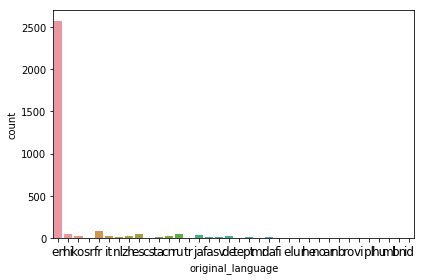

In [25]:
ax = sns.countplot(x="original_language", data=original_language)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
plt.tight_layout()
plt.rcParams["figure.figsize"] = (14, 4)
plt.show()

### overview

In [26]:
import spacy
from gensim.parsing.preprocessing import *
import gensim
from gensim import corpora
import nltk
import string
from gensim.utils import simple_preprocess
from tqdm import tqdm
from tqdm import tqdm_notebook as tqdm
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from wordcloud import WordCloud
from gensim import models

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


In [27]:
nlp = spacy.load('en')

In [28]:
train['overview'][1]

"Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess. Her best friend Lilly also joins her for the summer. Mia continues her 'princess lessons'- riding horses side-saddle, archery, and other royal. But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected..."

In [29]:
train['overview'].isnull().sum()

8

In [30]:
train["overview"] = train["overview"].fillna('NaN')

In [31]:
overview = train['overview'].tolist()

In [32]:
overview[0:5]

['When Lou, who has become the "father of the Internet," is shot by an unknown assailant, Jacob and Nick fire up the time machine again to save their friend.',
 "Mia Thermopolis is now a college graduate and on her way to Genovia to take up her duties as princess. Her best friend Lilly also joins her for the summer. Mia continues her 'princess lessons'- riding horses side-saddle, archery, and other royal. But her complicated life is turned upside down once again when she not only learns that she is to take the crown as queen earlier than expected...",
 'Under the direction of a ruthless instructor, a talented young drummer begins to pursue perfection at any cost, even his humanity.',
 'Vidya Bagchi (Vidya Balan) arrives in Kolkata from London to find her missing husband Arnab Bagchi. Seven months pregnant and alone in a festive city, she begins a relentless search for her husband. With nothing to rely on except fragments from her memories about him, all clues seem to reach a dead end w

In [33]:
def tokenization_list(texts):
    
    tokenization_list = []
    
    CUSTOM_FILTERS = [strip_tags, strip_punctuation,
                      strip_numeric, remove_stopwords, strip_short]
    
    for text in texts:
        
        #tokenization
        tokenized_text = preprocess_string(' '.join([w.lemma_ for w in nlp(text)]), CUSTOM_FILTERS)
        #remove'PRON' got from lemmatization
        tokenized_text = [token for token in tokenized_text if token != 'PRON']
        
        tokenization_list.append(tokenized_text)
    
    return tokenization_list

In [34]:
tokenization_each_text = tokenization_list(tqdm(overview))

In [35]:
import pickle
with open('tokenization_each_text.pickle', 'wb') as f:
    pickle.dump(tokenization_each_text, f)

In [36]:
#create dict and corpos for each doc
mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenization_each_text]
word_counts = [[(mydict[id], count)for id, count in line] for line in mycorpus]

In [ ]:
word_counts

In [38]:
#create dictionary for all docs
dict_word_counts = {}
for i in word_counts:
    for w, f in i:
        if w not in dict_word_counts.keys():
            dict_word_counts[w] = f
        else:
            dict_word_counts[w] += f

In [ ]:
dict_word_counts

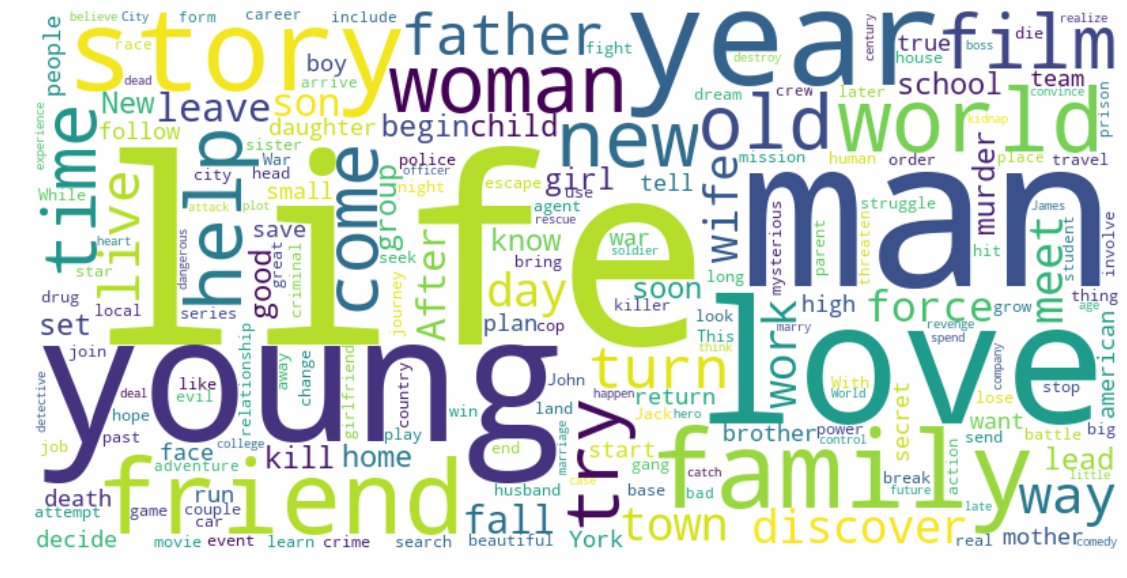

In [40]:
#wordcloud
wordcloud = WordCloud(background_color = 'white', width=800, height=400)
wordcloud.generate_from_frequencies(frequencies=dict_word_counts)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [41]:
#most frequency words from the top 10 highest edf score
word_counts_top30 = list(dict_word_counts.items())
word_counts_top30 = sorted(word_counts_top30, key=lambda x: x[1], reverse = True)
word_counts_top30 = word_counts_top30[0:30]
word_counts_top30 = dict(word_counts_top30)
word_counts_top30

{'life': 701,
 'man': 429,
 'young': 418,
 'love': 391,
 'year': 374,
 'story': 335,
 'family': 326,
 'friend': 317,
 'world': 291,
 'woman': 272,
 'new': 263,
 'help': 247,
 'film': 241,
 'try': 238,
 'old': 237,
 'time': 231,
 'come': 231,
 'turn': 227,
 'father': 225,
 'live': 216,
 'way': 208,
 'discover': 203,
 'wife': 201,
 'meet': 197,
 'day': 194,
 'town': 190,
 'work': 187,
 'force': 184,
 'leave': 181,
 'After': 180}

In [42]:
word_counts_bottom30 = sorted(list(dict_word_counts.items()), key=lambda x: x[1], reverse = False)
word_counts_bottom30 = word_counts_bottom30[0:20]
word_counts_bottom30 = dict(word_counts_bottom30)
word_counts_bottom30

{'Lilly': 1,
 'Thermopolis': 1,
 'archery': 1,
 'lessons': 1,
 'Arnab': 1,
 'Balan': 1,
 'mule': 1,
 'swimmer': 1,
 'Pinocchio': 1,
 'Scalawag': 1,
 'marionette': 1,
 'collectible': 1,
 'Cabinet': 1,
 'Jazeera': 1,
 'bias': 1,
 'causality': 1,
 'condemn': 1,
 'outlet': 1,
 'roundly': 1,
 'Flint': 1}

In [43]:
from nltk.corpus import stopwords
import string
from collections import Counter
import itertools

In [44]:
#Create a bag of words corpus
#create dictionary and the Corpus
mydict_c = corpora.Dictionary()
mycorpus = [mydict_c.doc2bow(doc, allow_update=True) for doc in tokenization_each_text]

In [45]:
with open('mycorpus.pickle', 'wb') as f:
    pickle.dump(mycorpus, f)

In [46]:
with open('mydict_c.pickle', 'wb') as handle:
    pickle.dump(mydict_c, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [47]:
#TFIDF
# TFIDF down weights tokens (words) that appears frequently across documents
##create the TF-IDF model
tfidf = models.TfidfModel(mycorpus, smartirs='ntc')

In [48]:
# Show the TF-IDF weights
for doc in tfidf[mycorpus]:
    tfidf_weight = ([[mydict[id], np.around(freq, decimals = 3)] for id, freq in doc])

In [49]:
tfidf_weight[0:10]

[['life', 0.116],
 ['young', 0.145],
 ['miss', 0.31],
 ['truth', 0.301],
 ['man', 0.149],
 ['website', 0.472],
 ['set', 0.209],
 ['photo', 0.4],
 ['uncover', 0.311],
 ['baby', 0.333]]

In [50]:
##tfidf weight sorted by descending
tfidf_weight_dict =dict(tfidf_weight)
sorted_tfidf_weight_dict = sorted(tfidf_weight_dict.items(), key=lambda kv: kv[1], reverse = True)
sorted_tfidf_weight_dict[0:10]

[('website', 0.472),
 ('photo', 0.4),
 ('person', 0.35),
 ('baby', 0.333),
 ('uncover', 0.311),
 ('miss', 0.31),
 ('truth', 0.301),
 ('set', 0.209),
 ('man', 0.149),
 ('young', 0.145)]

In [51]:
#top 30 words based on tfidf weight
sorted_tfidf_weight_dict_30 = sorted_tfidf_weight_dict[0:29]
sorted_tfidf_weight_dict_30 = dict(sorted_tfidf_weight_dict_30)
sorted_tfidf_weight_dict_30

{'website': 0.472,
 'photo': 0.4,
 'person': 0.35,
 'baby': 0.333,
 'uncover': 0.311,
 'miss': 0.31,
 'truth': 0.301,
 'set': 0.209,
 'man': 0.149,
 'young': 0.145,
 'life': 0.116}

In [52]:
#generate tfidf feature matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.corpus import stopwords

In [53]:
from sklearn.feature_extraction import text

my_additional_stop_words = ['year', 'story', 'world', 'time', 'film', 'day', 'life', 'man']
stop_words = text.ENGLISH_STOP_WORDS.union(my_additional_stop_words)

In [54]:
# generate tfidf matrix

tfidf_vect = TfidfVectorizer(stop_words=stop_words, 
                             max_df = 0.9,
                             min_df=50) 

In [55]:
dtm= tfidf_vect.fit_transform(overview)
print (dtm.shape)

(3000, 182)


In [56]:
dtm.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.57909311, 0.        ,
        0.        ],
       ...,
       [0.31690247, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.5295487 , 0.        ,
        0.        ]])

In [57]:
#put dtm back to training
train_t = pd.DataFrame(dtm.toarray(), columns = tfidf_vect.get_feature_names())

In [58]:
train_t.shape

(3000, 182)

In [59]:
#concat to original train data
train_2 = pd.concat([train, train_t], axis = 1)
train_2.shape

(3000, 226)

In [60]:
train_2.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,way,wife,woman,women,work,years,york,young,äì,äôs
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,Comedy,0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"Comedy,Drama,Family,Romance",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0.382865,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,3,0,3300000,Drama,1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.579093,0.0,0.0
3,4,0,1200000,"Drama,Thriller",1,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,5,0,0,"Action,Thriller",0,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


### production_companies

In [549]:
train_7['production_companies'].isnull().sum()

156

In [550]:
train_7['production_companies'] = train_7['production_companies'].fillna('[NaN]')

In [551]:
import ast
def parse_company(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [552]:
companies = train_7['production_companies'].map(lambda x: parse_company(x))

In [553]:
companies.shape

(3000,)

In [554]:
train_7['production_companies_count'] = companies.apply(lambda x : len(x))
train_7['production_companies_count'].shape

(3000,)

In [555]:
train_8 = pd.concat([train_8, train_7['production_companies_count']], axis = 1)
train_8.shape

(3000, 456)

### production_countries

In [62]:
train_2['production_countries'].isnull().sum()

55

In [63]:
train_2['production_countries'] = train_2['production_countries'].fillna('[NaN]')

In [64]:
import ast
def parse_country(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [65]:
countries=train_2['production_countries'].map(lambda x: parse_country(x))

In [66]:
countries.shape

(3000,)

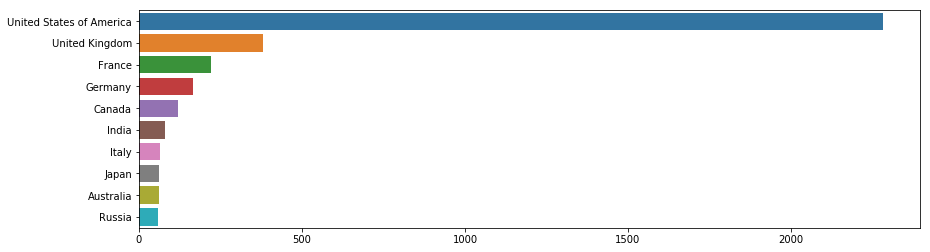

In [67]:
countries=countries.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
count=Counter([j for i in countries for j in i]).most_common(10)
sns.barplot([val[1] for val in count],[val[0] for val in count])

In [68]:
train_2['countries'] = countries
train_2['countries'][0:10]

0            [United States of America]
1            [United States of America]
2            [United States of America]
3                               [India]
4                         [South Korea]
5                                    []
6    [United States of America, Canada]
7                                    []
8            [United States of America]
9            [United States of America]
Name: countries, dtype: object

In [69]:
train_2['countries'].shape

(3000,)

In [70]:
countries_dummy = pd.get_dummies(train_2['countries'].apply(pd.Series).stack(dropna = False)
                                 , dummy_na = True).sum(level=0)

In [71]:
countries_dummy.shape

(3000, 75)

In [72]:
#concat to original train data
train_3 = pd.concat([train_2, countries_dummy], axis = 1)
train_3.shape

(3000, 302)

### release_date

In [74]:
train_3[['release_month','release_day','release_year']]=train_3['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)

In [75]:
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train_3.loc[ (train_3['release_year'] <= 19) & (train_3['release_year'] < 100), "release_year"] += 2000
train_3.loc[ (train_3['release_year'] > 19)  & (train_3['release_year'] < 100), "release_year"] += 1900

In [77]:
releaseDate = pd.to_datetime(train_3['release_date']) 
train_3['release_dayofweek'] = releaseDate.dt.dayofweek
train_3['release_quarter'] = releaseDate.dt.quarter

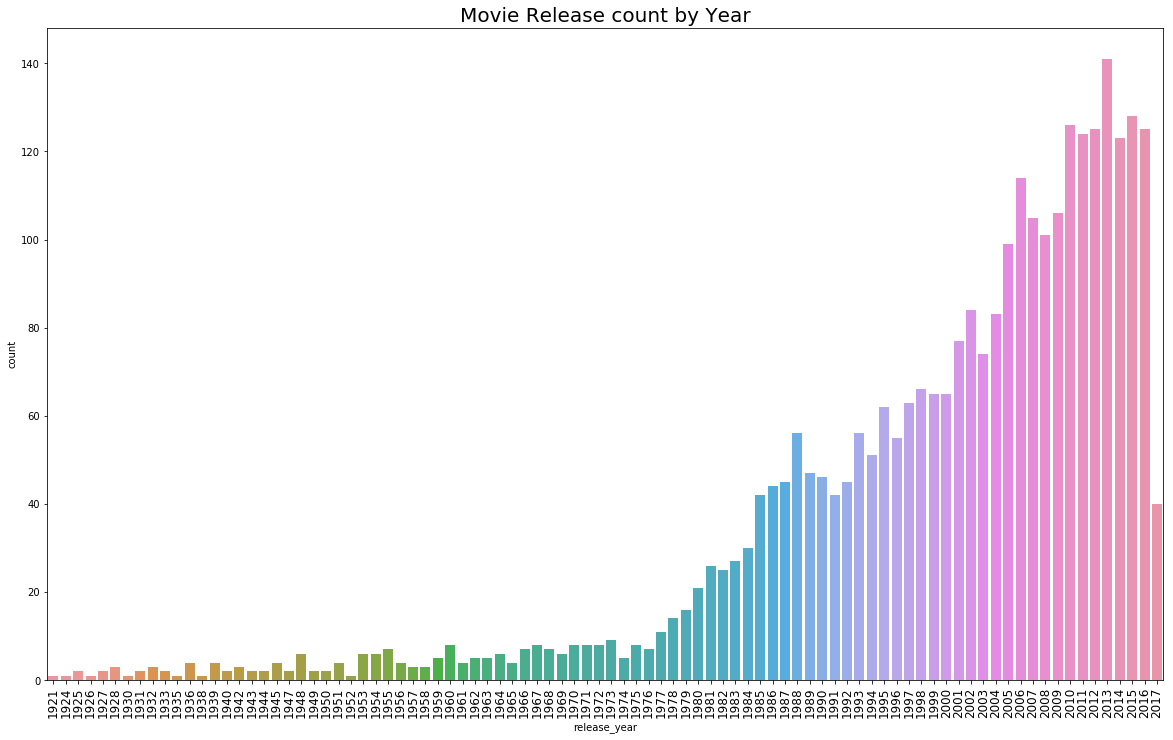

In [78]:
plt.figure(figsize=(20,12))
sns.countplot(train_3['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

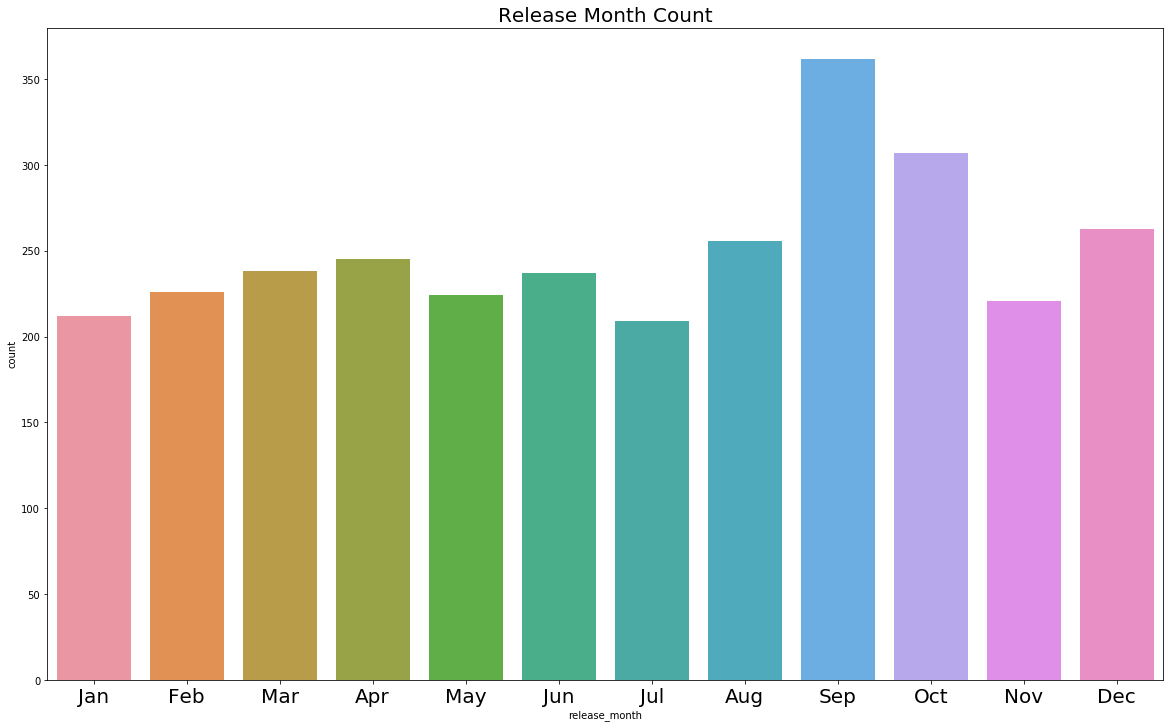

In [79]:
plt.figure(figsize=(20,12))
sns.countplot(train_3['release_month'].sort_values())
plt.title("Release Month Count",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

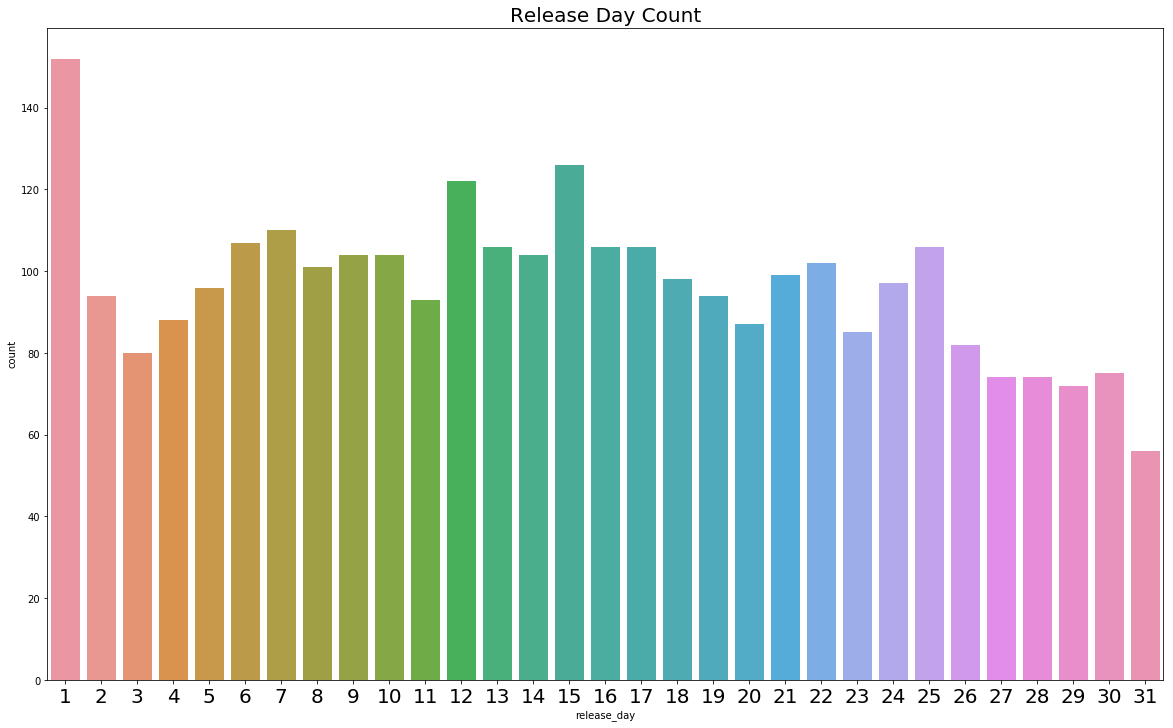

In [80]:
plt.figure(figsize=(20,12))
sns.countplot(train_3['release_day'].sort_values())
plt.title("Release Day Count",fontsize=20)
plt.xticks(fontsize=20)
plt.show()

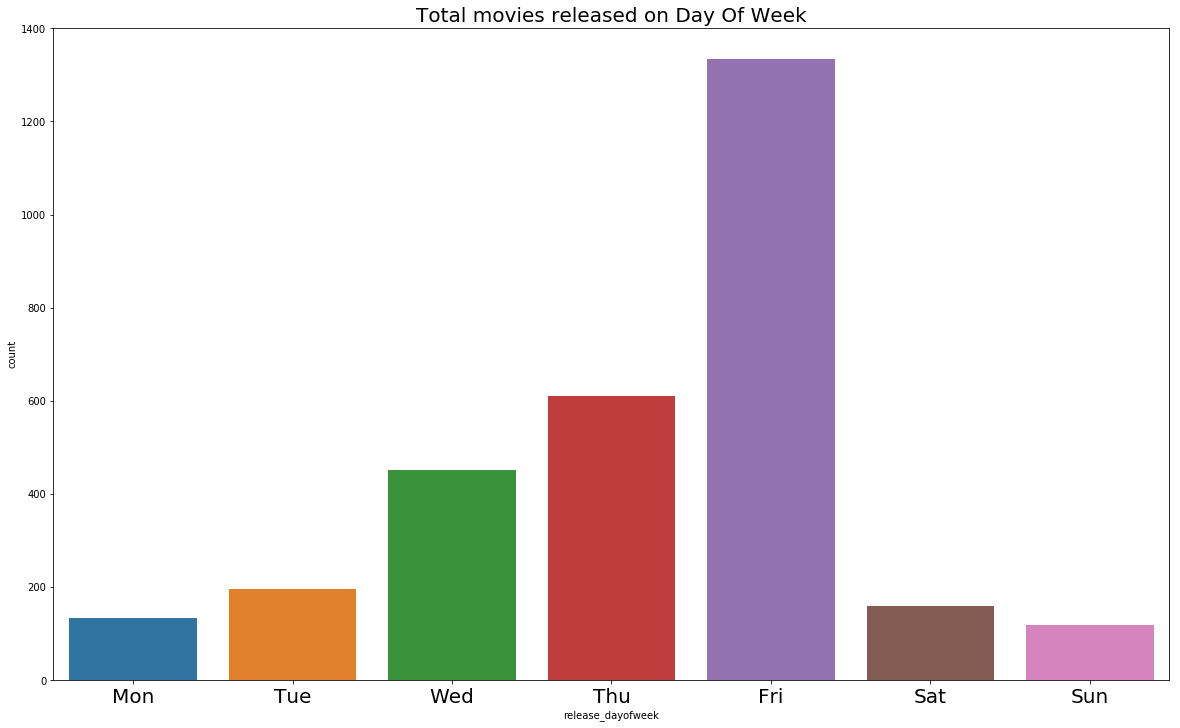

In [81]:
plt.figure(figsize=(20,12))
sns.countplot(train_3['release_dayofweek'].sort_values())
plt.title("Total movies released on Day Of Week",fontsize=20)
loc, labels = plt.xticks()
loc, labels = loc, ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
plt.xticks(loc, labels,fontsize=20)
plt.show()

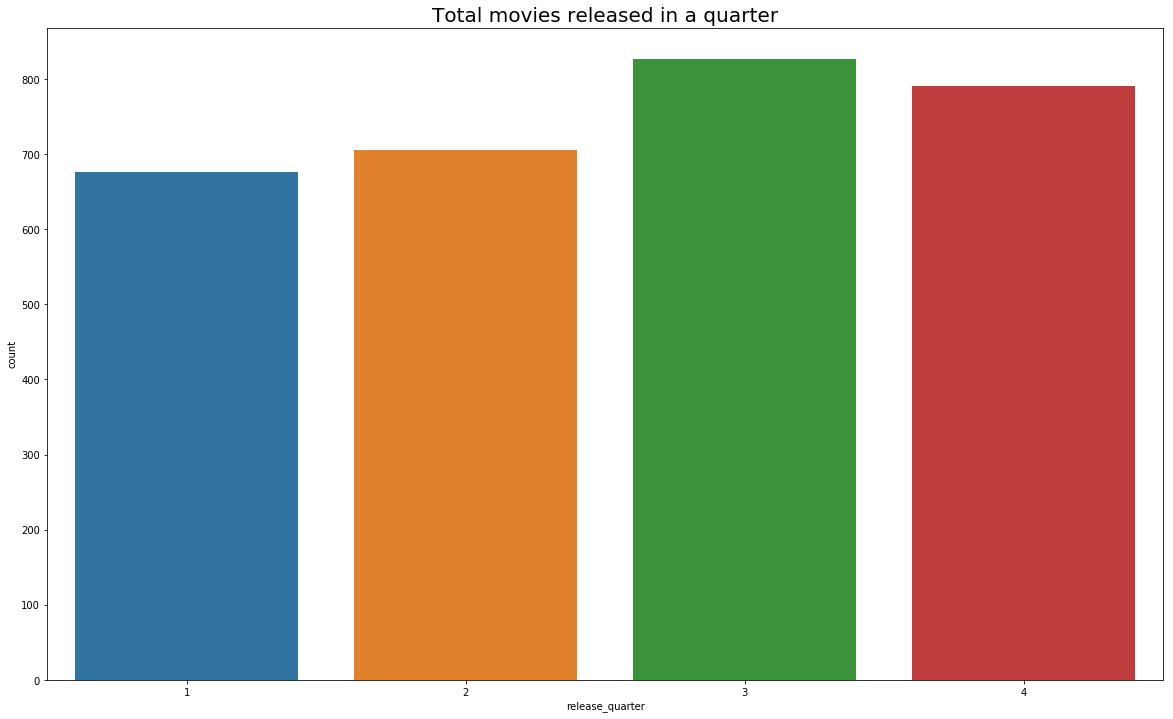

In [82]:
plt.figure(figsize=(20,12))
sns.countplot(train_3['release_quarter'].sort_values())
plt.title("Total movies released in a quarter",fontsize=20)
plt.show()

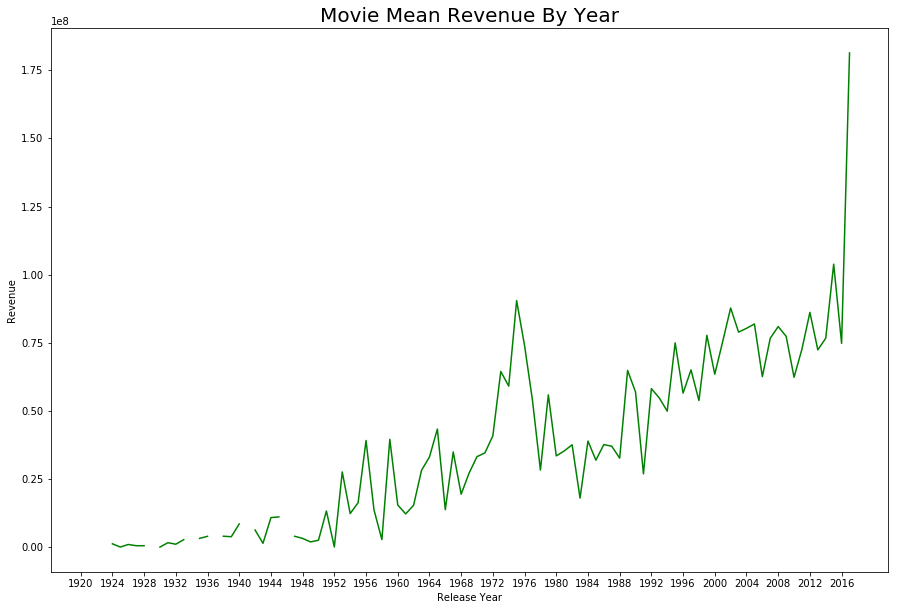

In [83]:
train_3['meanRevenueByYear'] = train_3.groupby("release_year")["revenue"].aggregate('mean')
train_3['meanRevenueByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year",fontsize=20)
plt.show()

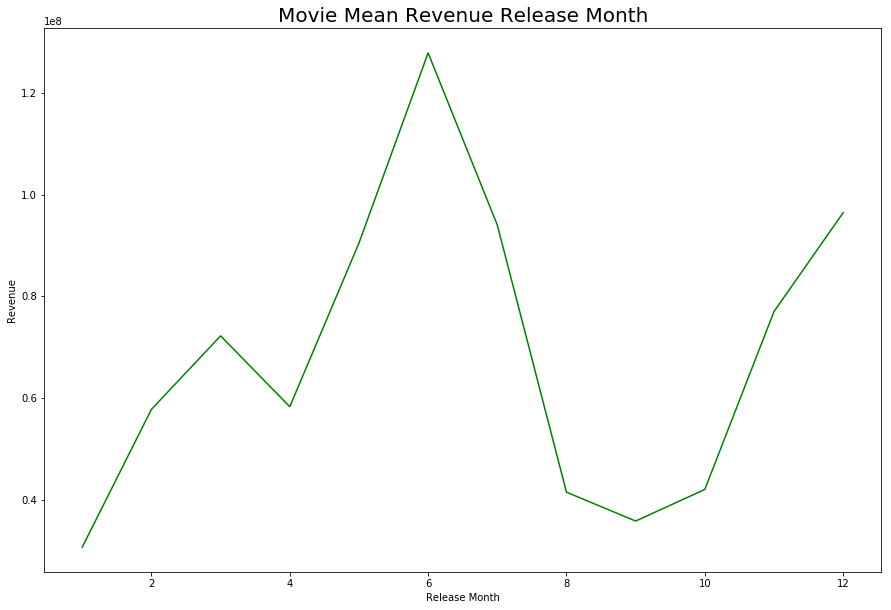

In [84]:
train_3['meanRevenueByMonth'] = train_3.groupby("release_month")["revenue"].aggregate('mean')
train_3['meanRevenueByMonth'].plot(figsize=(15,10),color="g")
plt.xlabel("Release Month")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue Release Month",fontsize=20)
plt.show()

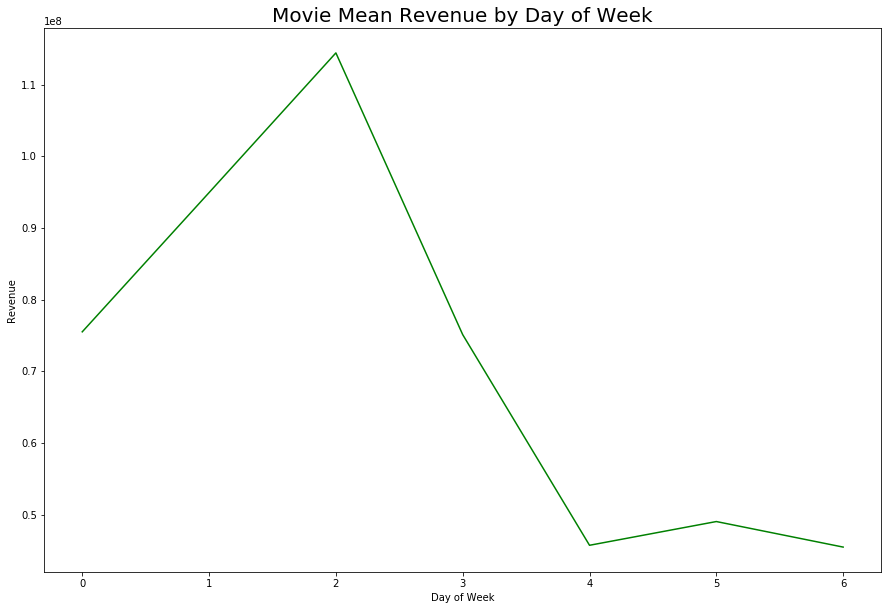

In [85]:
train_3['meanRevenueByDayOfWeek'] = train_3.groupby("release_dayofweek")["revenue"].aggregate('mean')
train_3['meanRevenueByDayOfWeek'].plot(figsize=(15,10),color="g")
plt.xlabel("Day of Week")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue by Day of Week",fontsize=20)
plt.show()

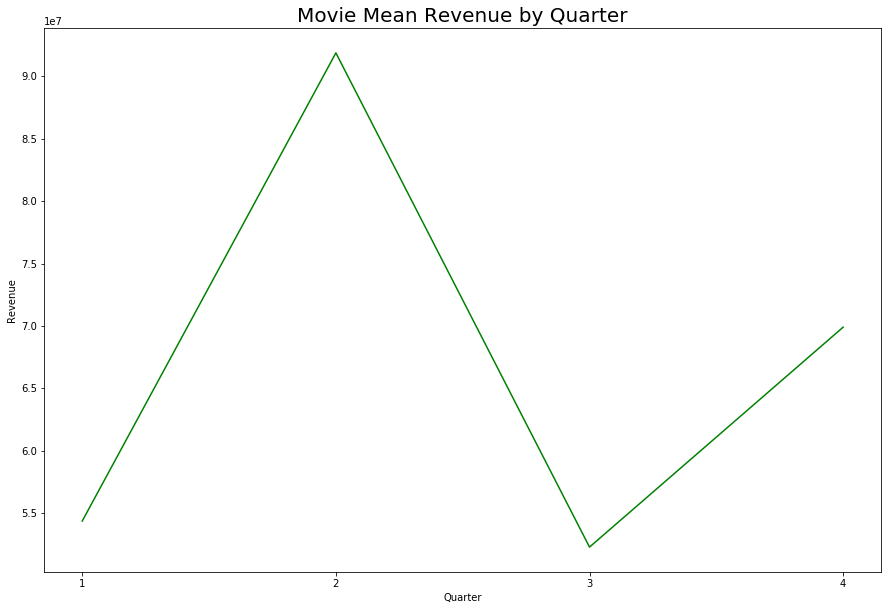

In [86]:
train_3['meanRevenueByQuarter'] = train_3.groupby("release_quarter")["revenue"].aggregate('mean')
train_3['meanRevenueByQuarter'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1,5,1))
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue by Quarter",fontsize=20)
plt.show()

### runtime

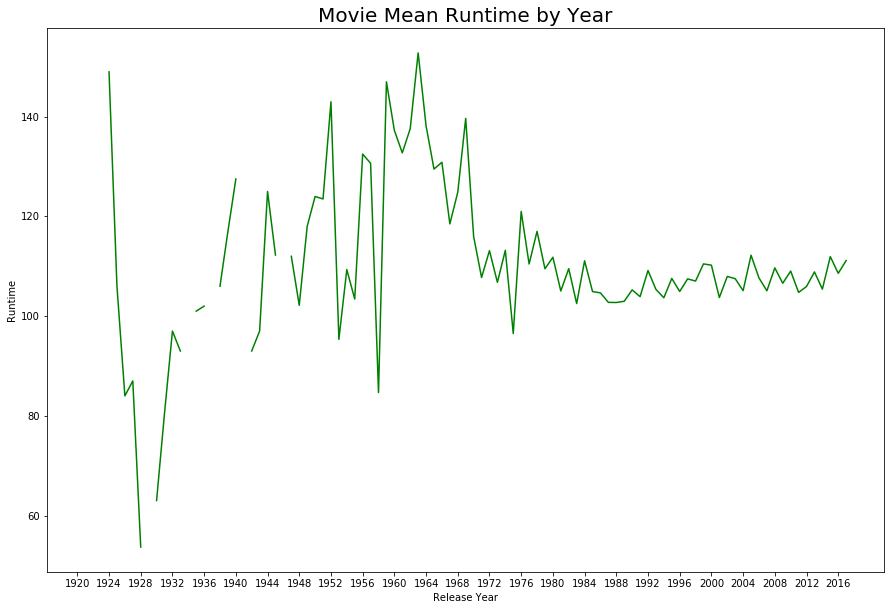

In [87]:
train_3['meanruntimeByYear'] = train_3.groupby("release_year")["runtime"].aggregate('mean')
train_3['meanruntimeByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Runtime")
plt.title("Movie Mean Runtime by Year",fontsize=20)
plt.show()

In [264]:
train_8['runtime'].isnull().sum()

2

In [265]:
train_8['runtime'] = train_8['runtime'].fillna(80)

In [270]:
train_8['runtime']  = train_8['runtime'].map({'80': 80})

### popularity

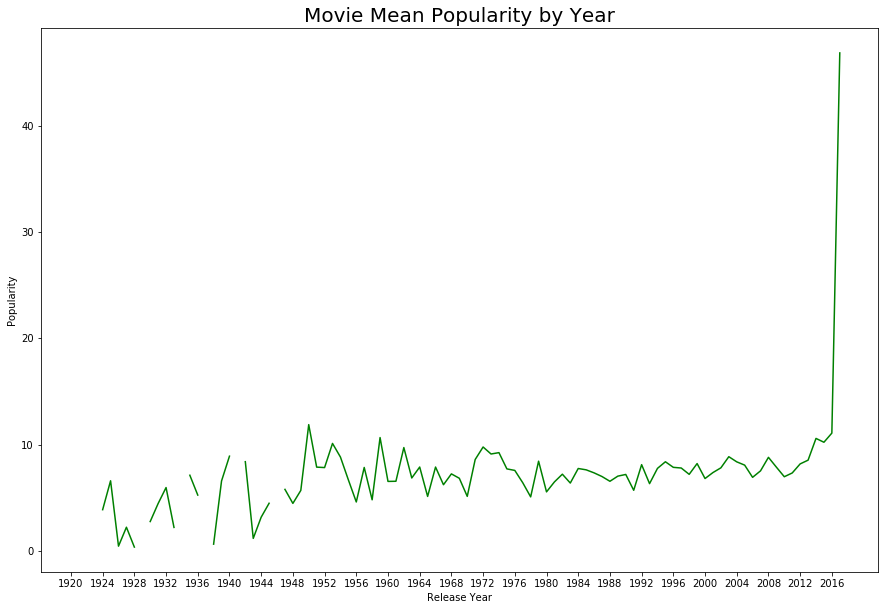

In [88]:
train_3['meanPopularityByYear'] = train_3.groupby("release_year")["popularity"].aggregate('mean')
train_3['meanPopularityByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Popularity")
plt.title("Movie Mean Popularity by Year",fontsize=20)
plt.show()

In [541]:
train_7['_releaseYear_popularity_ratio'] = train_7['release_year']/train_7['popularity']
train_7['_releaseYear_popularity_ratio2'] = train_7['popularity']/train_7['release_year']
train_7['meanPopularityByYear'] = train_7.groupby("release_year")["popularity"].aggregate('mean')

In [542]:
train_8 = pd.concat([train_8, train_7['_releaseYear_popularity_ratio']], axis = 1)

In [543]:
train_8 = pd.concat([train_8, train_7['_releaseYear_popularity_ratio2']], axis = 1)

In [544]:
train_8 = pd.concat([train_8, train_7['meanPopularityByYear']], axis = 1)

In [545]:
train_8.shape

(3000, 455)

### budget

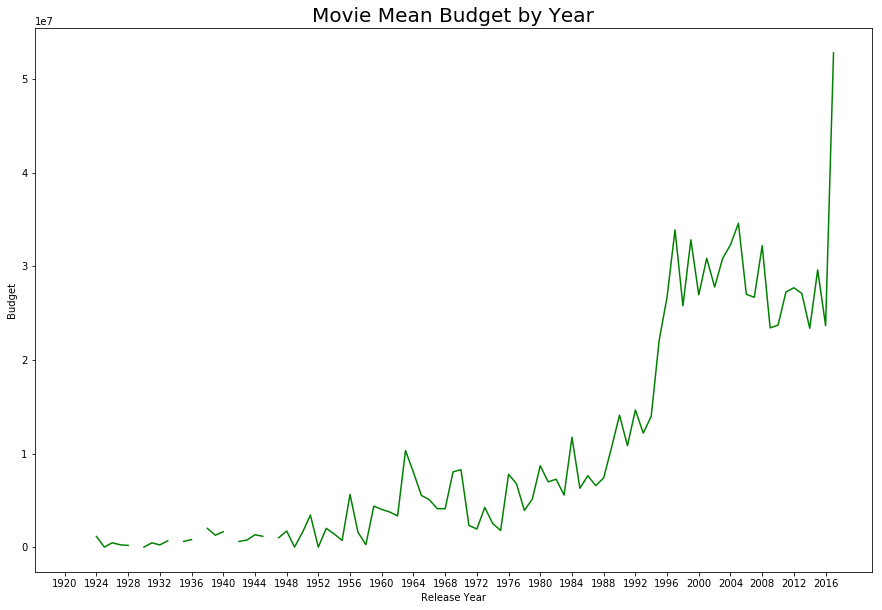

In [89]:
train_3['meanBudgetByYear'] = train_3.groupby("release_year")["budget"].aggregate('mean')
train_3['meanBudgetByYear'].plot(figsize=(15,10),color="g")
plt.xticks(np.arange(1920,2018,4))
plt.xlabel("Release Year")
plt.ylabel("Budget")
plt.title("Movie Mean Budget by Year",fontsize=20)
plt.show()

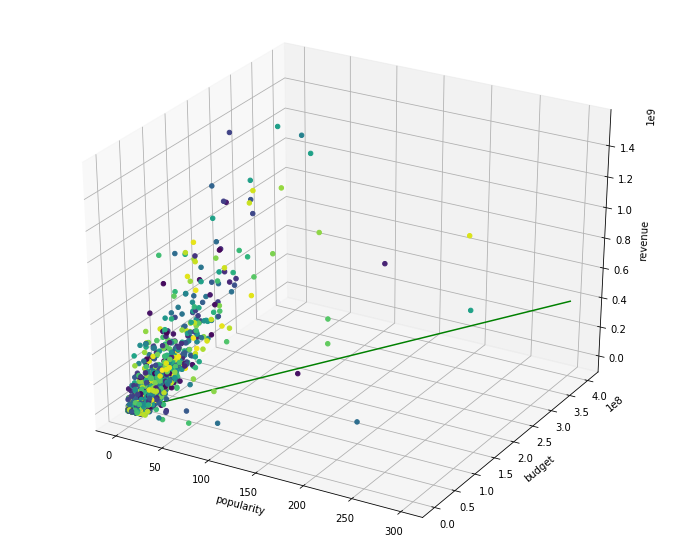

In [519]:
#budget, popularity ~ revenue

from mpl_toolkits.mplot3d import axes3d, Axes3D

fig, ax = plt.subplots(1,2,figsize=(12,10))
plt.subplot(1,2,1)
ax = plt.subplot(projection='3d')
colors = np.random.rand(len(train_7))

xs = np.array(train_7['popularity'])
ys = np.array(train_7['budget'])
zs = np.array(train_7['revenue'])
ax.scatter(xs,ys, zs, c= colors,marker='o', alpha=1)
plt.plot([0,300],[0,400000000],[0,400000000],c="green")

ax.set_xlabel('popularity')
ax.set_ylabel('budget')
ax.set_zlabel('revenue')

plt.show()


In [520]:
#log budget
train_7['budget'] = np.log1p(train_7['budget'])

In [522]:
train_7['budget'].head()

0    16.454568
1    17.504390
2    15.009433
3    13.997833
4     0.000000
Name: budget, dtype: float64

In [523]:
train_8 = pd.concat([train_8, train_7['budget']], axis = 1)
train_8.shape

(3000, 444)

In [524]:
### budget runtime ratio
train_7["budget_runtime_ratio"] = train_7['budget']/train_7['runtime'] 

In [525]:
train_8 = pd.concat([train_8, train_7["budget_runtime_ratio"]], axis = 1)
train_8.shape

(3000, 445)

In [526]:
### budget popularity ratio
train_7['budget_popularity_ratio'] = train_7['budget']/train_7['popularity']

In [527]:
train_8 = pd.concat([train_8, train_7['budget_popularity_ratio']], axis = 1)
train_8.shape

(3000, 446)

In [528]:
### budget year ratio
train_7['budget_year_ratio'] = train_7['budget']/(train_7['release_year']*train_7['release_year'])

In [529]:
train_8 = pd.concat([train_8, train_7['budget_year_ratio']], axis = 1)
train_8.shape

(3000, 447)

In [531]:
### mean budget by year
train_7['meanBudgetByYear'] = train_7.groupby("release_year")["budget"].aggregate('mean')

In [532]:
train_8 = pd.concat([train_8, train_7['meanBudgetByYear']], axis = 1)
train_8.shape

(3000, 448)

### spoken_languages

In [90]:
train_3['spoken_languages'].isnull().sum()

20

In [91]:
train_3['spoken_languages'] = train_3['spoken_languages'].fillna('[NaN]')

In [92]:
import ast
def parse_lang(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [93]:
lang=train_3['spoken_languages'].map(lambda x: parse_lang(x))

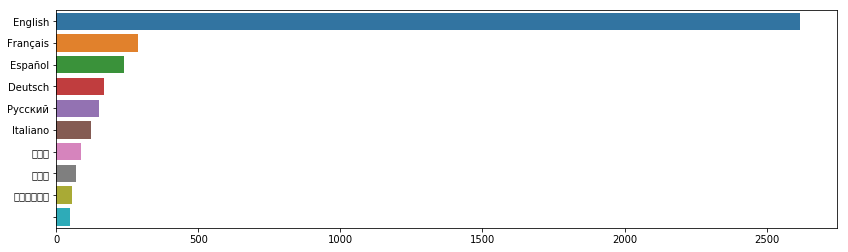

In [94]:
lang=lang.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
lang_count=Counter([j for i in lang for j in i]).most_common(10)
sns.barplot([val[1] for val in lang_count],[val[0] for val in lang_count])

In [95]:
train_3['lang'] = lang
train_3['lang'][0:10]

0             [English]
1             [English]
2             [English]
3     [English, हिन्दी]
4             [한국어/조선말]
5             [English]
6             [English]
7    [العربية, English]
8             [English]
9             [English]
Name: lang, dtype: object

In [96]:
lang_dummy = pd.get_dummies(train_3['lang'].apply(pd.Series).stack(dropna = False)
                                 , dummy_na = True).sum(level=0)

In [97]:
#concat to original train data
train_4 = pd.concat([train_3, lang_dummy], axis = 1)
train_4.shape

(3000, 372)

### tagline

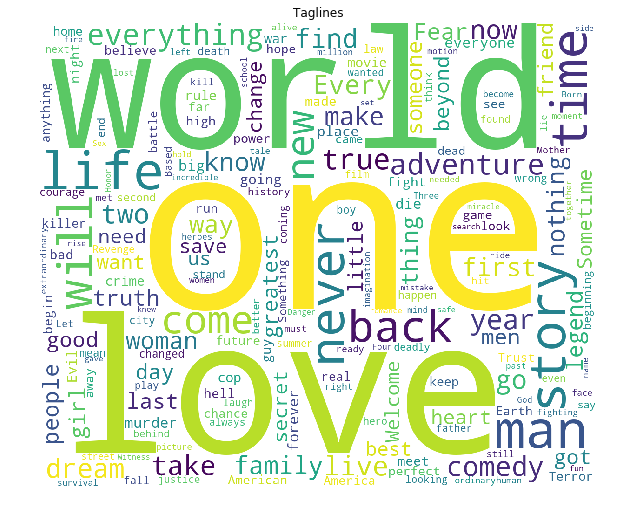

In [98]:
plt.figure(figsize=(10,10))
taglines=' '.join(train_4['tagline'].apply(lambda x:x if x is not np.nan else ''))

wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=1000).generate(taglines)
plt.imshow(wordcloud)
plt.title('Taglines')
plt.axis("off")
plt.show()

#### word embadding

### keywords

In [99]:
train_4['Keywords'].isnull().sum()

276

In [100]:
train_4['Keywords']= train_4['Keywords'].fillna('[NaN]')

In [101]:
import ast
def parse_keywords(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [102]:
keywords=train_4['Keywords'].map(lambda x: parse_keywords(x))

In [103]:
keywords[0:10]

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3    [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                   []
5                                                   []
6                                                   []
7    [{'id': 917, 'name': 'journalism'}, {'id': 163...
8    [{'id': 2041, 'name': 'island'}, {'id': 4418, ...
9    [{'id': 11800, 'name': 'mockumentary'}, {'id':...
Name: Keywords, dtype: object

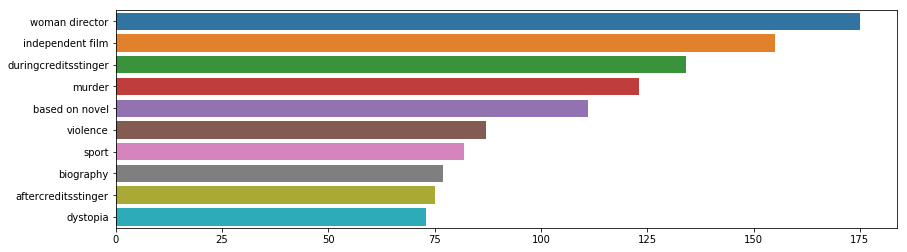

In [104]:
keywords=keywords.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
keywords_count=Counter([j for i in keywords for j in i]).most_common(10)
sns.barplot([val[1] for val in keywords_count],[val[0] for val in keywords_count])

In [105]:
train_4['Keywords'] = keywords
train_4['Keywords'][0:10]

0    [time travel, sequel, hot tub, duringcreditsst...
1        [coronation, duty, marriage, falling in love]
2    [jazz, obsession, conservatory, music teacher,...
3    [mystery, bollywood, police corruption, crime,...
4                                                   []
5                                                   []
6                                                   []
7    [journalism, translation, television, manipula...
8         [island, pirate gang, puppet, treasure hunt]
9                          [mockumentary, folk singer]
Name: Keywords, dtype: object

In [106]:
keywords_l = keywords.tolist()

In [107]:
keywords_ll = [[' '.join(i)] for i in keywords_l]
len(keywords_ll)

3000

In [108]:
keywords_flat_list = [item for sublist in keywords_ll for item in sublist]

In [109]:
len(keywords_flat_list)

3000

In [110]:
# generate tfidf matrix
tfidf_vect_2 = TfidfVectorizer(stop_words=None, min_df=50) 

In [111]:
dtm_2= tfidf_vect_2.fit_transform(keywords_flat_list)
print (dtm_2.shape)

(3000, 73)


In [112]:
#put dtm back to training
train_k = pd.DataFrame(dtm_2.toarray(), columns = tfidf_vect_2.get_feature_names())

In [113]:
train_k.shape

(3000, 73)

In [114]:
#concat to original train data
train_5 = pd.concat([train_4, train_k], axis = 1)
train_5.shape

(3000, 445)

### cast

In [115]:
train_5['cast'].isnull().sum()

13

In [116]:
train_5['cast']= train_5['cast'].fillna('[NaN]')

In [117]:
import ast
def parse_cast(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [135]:
cast=train_5['cast'].map(lambda x: parse_cast(x))

#### name_cast

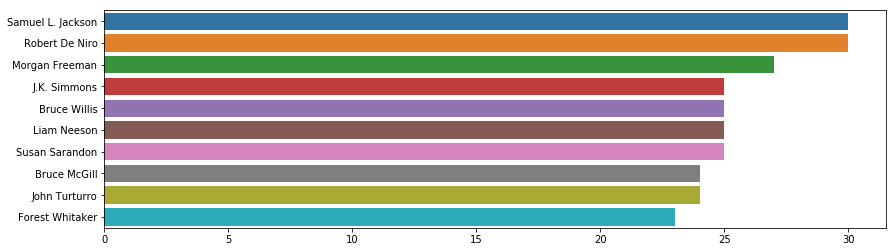

In [136]:
cast_name=cast.apply(lambda x: [i['name'] for i in x] if x!={} else []).values
cast_name_count=Counter([j for i in cast_name for j in i]).most_common(10)
sns.barplot([val[1] for val in cast_name_count],[val[0] for val in cast_name_count])

In [137]:
cast_name_count[0:5]

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25)]

In [138]:
cast_name_count_30=Counter([j for i in cast_name for j in i]).most_common(30)
cast_name_mostcommon = [x[0] for x in cast_name_count_30]
cast_name_mostcommon[0:10]

['Samuel L. Jackson',
 'Robert De Niro',
 'Morgan Freeman',
 'J.K. Simmons',
 'Bruce Willis',
 'Liam Neeson',
 'Susan Sarandon',
 'Bruce McGill',
 'John Turturro',
 'Forest Whitaker']

In [139]:
len(cast_name_mostcommon)

30

In [141]:
cast_name_l = cast_name.tolist()
len(cast_name_l)

3000

In [142]:
cast_name_l[0:1]

[['Rob Corddry',
  'Craig Robinson',
  'Clark Duke',
  'Adam Scott',
  'Chevy Chase',
  'Gillian Jacobs',
  'Bianca Haase',
  'Collette Wolfe',
  'Kumail Nanjiani',
  'Kellee Stewart',
  'Josh Heald',
  'Gretchen Koerner',
  'Lisa Loeb',
  'Jessica Williams',
  'Bruce Buffer',
  'Mariana Paola Vicente',
  'Christian Slater',
  'Jason Jones',
  'Olivia Jordan',
  'Christine Bently',
  'Stacey Asaro',
  'John Cusack',
  'Adam Herschman',
  'Kisha Sierra']]

In [143]:
train_5['cast_name'] = cast_name_l

In [144]:
len(Counter([j for i in cast_name for j in i]).most_common())

38588

In [145]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
train_6 = train_5.join(pd.DataFrame(mlb.fit_transform(train_5.pop('cast_name')),
                          columns=mlb.classes_,
                          index=train_5.index))
train_6.shape

(3000, 39036)

In [146]:
cast_name_col = train_6.loc[:,'genders_2_cast':]

In [147]:
cast_name_col_ = cast_name_col.loc[:, (cast_name_col.sum(axis=0) > 20)]
cast_name_col_.shape

(3000, 21)

In [148]:
train_7 = pd.concat([train_5, cast_name_col_], axis = 1)
train_7.shape

(3000, 469)

#### gender_cast

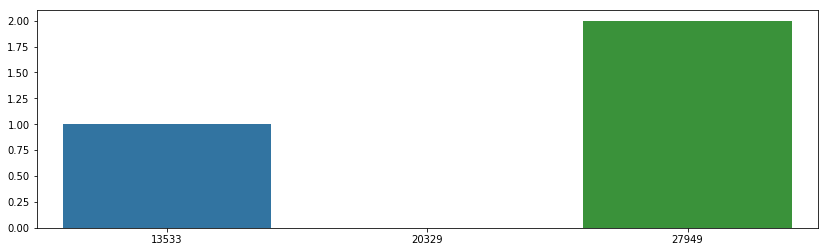

In [129]:
cast_sex=cast.apply(lambda x: [i['gender'] for i in x] if x!={} else []).values
cast_sex_count=Counter([j for i in cast_sex for j in i]).most_common(3)
sns.barplot([val[1] for val in cast_sex_count],[val[0] for val in cast_sex_count])

In [130]:
cast_sex_count

[(2, 27949), (0, 20329), (1, 13533)]

In [131]:
train_5['genders_0_cast'] = cast.apply(lambda x: sum([1 for i in x if i['gender'] == 0]))
train_5['genders_1_cast'] = cast.apply(lambda x: sum([1 for i in x if i['gender'] == 1]))
train_5['genders_2_cast'] = cast.apply(lambda x: sum([1 for i in x if i['gender'] == 2]))

In [132]:
train_5['genders_0_cast'][0:10]

0     6
1     0
2    31
3     4
4     0
5     2
6     4
7     3
8     5
9     2
Name: genders_0_cast, dtype: int64

In [133]:
train_5.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,true,violence,war,wife,woman,world,york,genders_0_cast,genders_1_cast,genders_2_cast
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,Comedy,0,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,6,8,10
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"Comedy,Drama,Family,Romance",0,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0,10,10
2,3,0,3300000,Drama,1,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,0.0,0.447086,0.0,0.0,0.0,0.0,0.456909,31,7,13
3,4,0,1200000,"Drama,Thriller",1,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,4,1,2
4,5,0,0,"Action,Thriller",0,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0,0,4


### crew

In [149]:
cols=pd.Series(train_7.columns)
len(cols)

469

In [150]:
train_7.columns = pd.io.parsers.ParserBase({'names':train_7.columns})._maybe_dedup_names(train_7.columns) 

In [151]:
train_7['crew'].isnull().sum()

16

In [152]:
train_7['crew']= train_7['crew'].fillna('[NaN]')

In [153]:
train_7['crew'].head()

0    [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1    [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2    [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3    [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4    [{'credit_id': '52fe464b9251416c75073b43', 'de...
Name: crew, dtype: object

In [154]:
import ast
def parse_crew(x):
    try:
        results = ast.literal_eval(x)
    except:
        results = []
    return results

In [155]:
crew=train_7['crew'].map(lambda x: parse_crew(x))

#### crew name

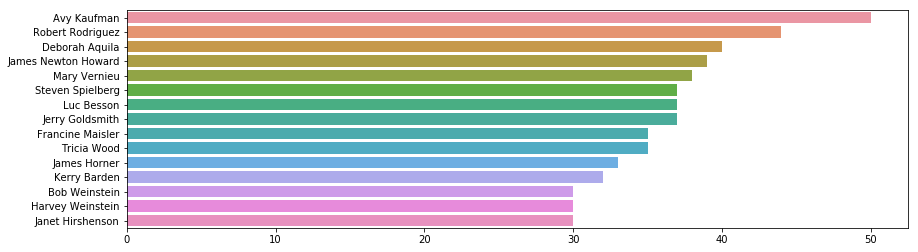

In [156]:
crew_names = list(crew.apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
crew_name_count=Counter([i for j in crew_names for i in j]).most_common(15)
sns.barplot([val[1] for val in crew_name_count],[val[0] for val in crew_name_count])

In [157]:
#crew_names_l = crew_names.tolist()
len(crew_names)

3000

#### department_crew

### original_langauge

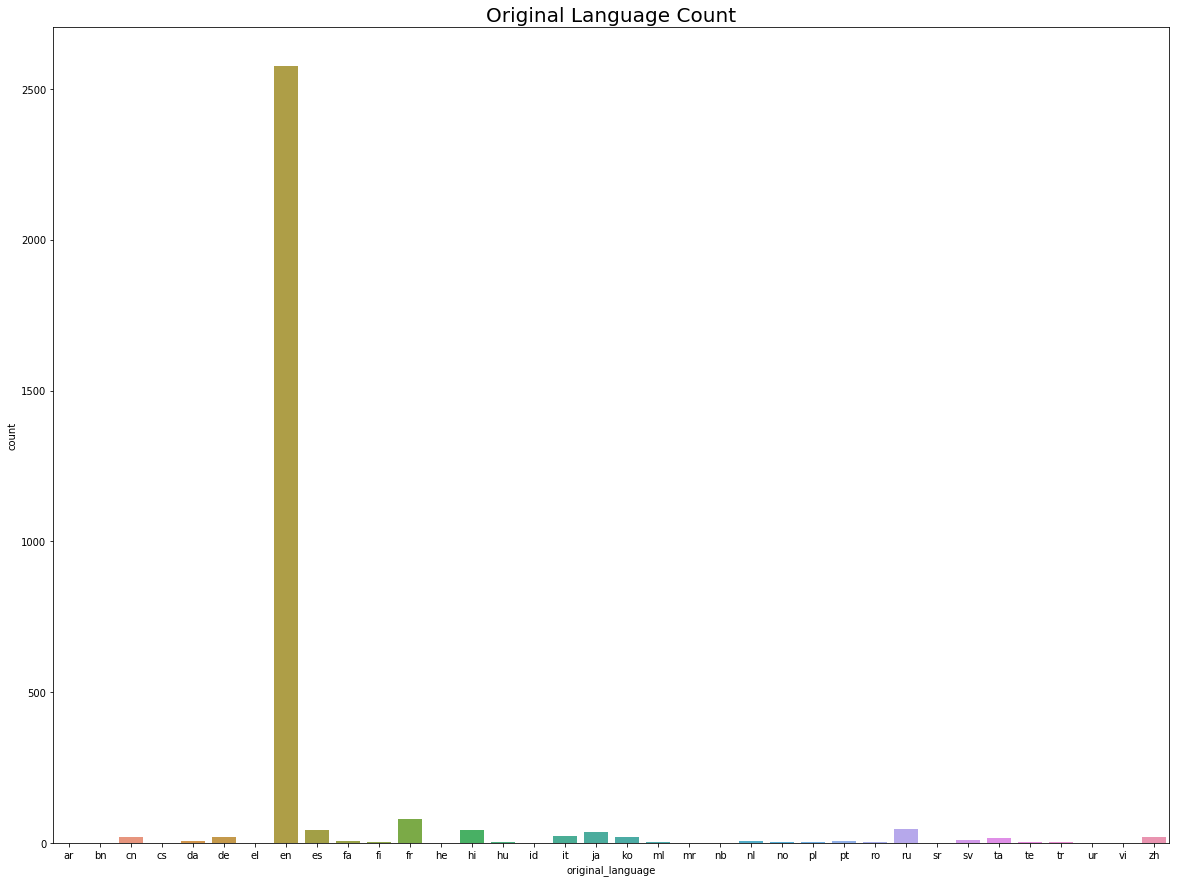

In [158]:
plt.figure(figsize=(20,15))
sns.countplot(train_7['original_language'].sort_values())
plt.title("Original Language Count",fontsize=20)
plt.show()

In [159]:
train_7['original_language'].isnull().sum()

0

In [160]:
train_7.loc[train_7['original_language']=='en', 'original_language'] = 1
train_7.loc[train_7['original_language']!=1, 'original_language'] = 0

In [161]:
train_7['original_language'].shape

(3000,)

In [162]:
train_7['revenue'].isnull().sum()

0

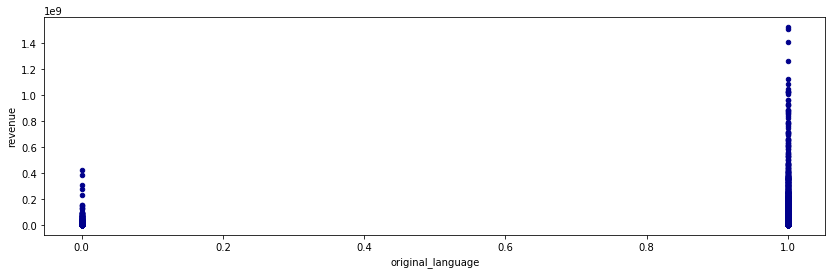

In [163]:
ax1 = train_7.plot.scatter(x='original_language', y='revenue', c='DarkBlue')

### title

In [533]:
# different between original title and title

train_7['isTitleDifferent'] = 1

train_7.loc[train_7['original_title'] == train_7['title'] ,"isTitleDifferent"] = 0 

In [534]:
train_7['isTitleDifferent'].head()

0    0
1    0
2    0
3    0
4    1
Name: isTitleDifferent, dtype: int64

In [535]:
train_8 = pd.concat([train_8, train_7['isTitleDifferent']], axis = 1)
train_8.shape

(3000, 449)

In [536]:
train_7['original_title_letter_count'] = train_7['original_title'].str.len() 
train_7['original_title_word_count'] = train_7['original_title'].str.split().str.len() 
train_7['title_word_count'] = train_7['title'].str.split().str.len()

In [537]:
train_8 = pd.concat([train_8, train_7['original_title_letter_count']], axis = 1)

In [538]:
train_8 = pd.concat([train_8, train_7['original_title_word_count']], axis = 1)

In [539]:
train_8 = pd.concat([train_8, train_7['title_word_count']], axis = 1)

In [540]:
train_8.shape

(3000, 452)

### drop columns

In [197]:
train_7.shape

(3000, 469)

In [198]:
list(train_7.columns.values)

['id',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'Keywords',
 'cast',
 'crew',
 'revenue',
 'collection_nm',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'agent',
 'american',
 'angeles',
 'army',
 'attempt',
 'away',
 'based',
 'battle',
 'beautiful',
 'begins',
 'best',
 'big',
 'boy',
 'british',
 'brother',
 'business',
 'called',
 'car',
 'career',
 'case',
 'chance',
 'change',
 'child',
 'children',
 'city',
 'college',
 'come',
 'comedy',
 'comes',
 'company',
 'cop',
 'country',
 'couple',
 'crew.1',
 'crime',
 'dangerous',
 'daughter'

In [199]:
train_8 = train_7.drop('id',axis=1)

In [201]:
train_8 = train_8.drop('belongs_to_collection',axis=1)

In [203]:
train_8 = train_8.drop('production_countries',axis=1)

In [204]:
train_8 = train_8.drop('production_companies',axis=1)

In [205]:
train_8 = train_8.drop('spoken_languages',axis=1)

In [206]:
train_8 = train_8.drop('genres',axis=1)

In [207]:
train_8 = train_8.drop(['Keywords',
                        'cast', 
                        'crew',
                        'status', 
                        'imdb_id', 
                        'poster_path', 
                        'release_date', 
                        'tagline', 
                        'title', 
                        'original_title', 
                        'overview'], axis = 1)

In [208]:
train_8.shape

(3000, 452)

In [209]:
list(train_8.columns.values)

['budget',
 'homepage',
 'original_language',
 'popularity',
 'runtime',
 'revenue',
 'collection_nm',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'agent',
 'american',
 'angeles',
 'army',
 'attempt',
 'away',
 'based',
 'battle',
 'beautiful',
 'begins',
 'best',
 'big',
 'boy',
 'british',
 'brother',
 'business',
 'called',
 'car',
 'career',
 'case',
 'chance',
 'change',
 'child',
 'children',
 'city',
 'college',
 'come',
 'comedy',
 'comes',
 'company',
 'cop',
 'country',
 'couple',
 'crew.1',
 'crime',
 'dangerous',
 'daughter',
 'days',
 'dead',
 'death',
 'decides',
 'detective',
 'discover',
 'discovers',
 'does',
 'dr',
 'dreams',
 'drug',
 'earth',
 'end',
 'escape',
 'events',
 'evil',
 'ex',
 'face',
 'falls',
 'family',
 'father',
 'fight',
 'finds',
 'follows',
 'forced

In [214]:
train_8 = train_8.drop('collection_nm',axis=1)

In [241]:
train_8 = train_8.drop('countries',axis=1)

In [242]:
train_8 = train_8.drop('lang',axis=1)

In [248]:
train_8 = train_8.drop(['meanRevenueByYear',
                        'meanRevenueByMonth',
                       'meanRevenueByDayOfWeek',
                       'meanRevenueByQuarter',
                       'meanruntimeByYear',
                        'meanPopularityByYear',
                        'meanBudgetByYear'],axis=1)

In [273]:
train_8 = train_8.drop('runtime',axis=1)

In [274]:
train_8.shape

(3000, 441)

In [276]:
train_8 = pd.concat([train_8, train_7['runtime']], axis = 1)
train_8.shape

(3000, 442)

In [277]:
train_8['runtime'].isnull().sum()

2

In [278]:
train_8['runtime']= train_8['runtime'].fillna(80)

In [512]:
np.any(np.isnan(train_8))

False

In [511]:
train_8 = pd.concat([train_8, train['collection_nm']], axis = 1)
train_8.shape

(3000, 443)

In [ ]:
#train_8.isnull().sum()

In [ ]:
#train_8.fillna(value=0.0, inplace = True) 

In [513]:
train_8.to_csv("data/train_8.csv")

## Train model

In [321]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [281]:
X = train_8.drop('revenue', axis=1)
y = train_8[['revenue']]

In [282]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [306]:
y_train.shape

(2250, 1)

In [309]:
X_test.shape

(750, 441)

In [310]:
y_test.shape

(750, 1)

In [305]:
X_train.shape

(2250, 441)

In [322]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (100),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],                               random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=5, scoring=score_rmsle)

    return scores

In [351]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted'])

In [363]:
rfr = RandomForestRegressor(max_depth=8, n_estimators=50, min_samples_leaf= 2,                                
                            random_state=False, verbose=False)
# Perform K-Fold CV
scores = cross_val_score(rfr, X_train.values, y_train.revenue.values, cv=5, scoring=score_rmsle)

In [364]:
scores.mean()

2.8611036096438234

In [495]:
rfr.fit(X.values, y.values)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=False, verbose=False,
           warm_start=False)

## Linear model

In [458]:
X_train.shape

(2250, 441)

In [491]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import FunctionTransformer, QuantileTransformer
from sklearn.compose import TransformedTargetRegressor

transformer = FunctionTransformer(func=np.log, inverse_func=np.exp, validate=True)
# transformer = QuantileTransformer(output_distribution='normal')
# regressor = sklearn.linear_model.ElasticNet(alpha=1, l1_ratio=0.5)
regressor = sklearn.ensemble.GradientBoostingRegressor()
regr = TransformedTargetRegressor(regressor=regressor,
                                   transformer=transformer)

estimators = [('reduce_dim', TruncatedSVD(n_components=50)), 
              ('lm', regr),
             ]

pipe = Pipeline(estimators)


In [492]:
scores = cross_val_score(pipe, X_train.values, y_train.revenue.values, cv=5, scoring=score_rmsle)

In [493]:
scores.mean()

2.2808728915794303

### Evaluation: RMSLE

In [346]:
import math

#A function to calculate Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5

In [370]:
def score_rmsle(estimator, X, y):
    y_pred = estimator.predict(X)
    assert len(y) == len(y_pred)
    return (sklearn.metrics.mean_squared_log_error(y, y_pred)) ** 0.5